<a href="https://colab.research.google.com/github/nilesh3030/Stroke-Prediction/blob/main/Stroke_prediction_2021_data_20230214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Stroke_Prediction/Data/stroke_data/stroke_case_2021.csv', low_memory = False)
pd.set_option ('display.max_columns', None)
pd.set_option ('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(df.shape)
#df.head()

(113155, 1124)


In [5]:
#df.start_t.value_counts()

In [4]:
len(df.jaenan_sn.unique())

113100

In [5]:
# There are many junk columns that have been added so we will remove all of them 
df = df.loc[:,:'pti2']
print(df.shape)

(113155, 639)


In [6]:
missing_variables = round((df.isna().sum()/len(df))*100,2)

In [9]:
#type(missing_variables)

In [7]:
missing_variables = missing_variables.loc[lambda x : x >= 30]

var_to_remove = missing_variables.index

len(var_to_remove)
### We have 453 columns that has more 30% null values so we will be dropping those variables for now.

288

In [8]:
var_to_remove = [e for e in var_to_remove if e not in ('sx2', 'sx3', 'sx4', 'sx5')]

len(var_to_remove)

284

In [9]:
data = df.drop(columns= var_to_remove)

In [13]:
print(data.shape)
#data.head()

## After removing the variables with high null values, we are left with the 272 variable and now we will explore and assess these varibles as per info and domain knowledge to get the relevant varibles for our analysis.

(113155, 355)


In [10]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  14


,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,start_d,arrival_t
0,81.0,117.0,149.0,14.0,37.1,96.0,88.0,121.0,142.0,13.0,36.9,97.0,20210123.0,1659.0
1,50.0,85.0,75.0,18.0,37.7,99.0,88.0,105.0,81.0,18.0,37.7,96.0,20210128.0,2055.0
2,70.0,105.0,75.0,18.0,34.0,98.0,60.0,102.0,75.0,18.0,34.0,98.0,20210130.0,2312.0
3,46.0,102.0,70.0,18.0,37.0,95.0,50.0,80.0,68.0,18.0,37.0,99.0,20210203.0,1149.0
4,108.0,207.0,60.0,18.0,35.0,99.0,80.0,190.0,62.0,18.0,35.0,99.0,20210204.0,1420.0


In [11]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

# let's visualise the values of the categorical variables
data[cat_vars].head()

Number of categorical variables:  341


,jaenan_sn,sn,fs,fdsn,car_numb,car_class,call_method,control,distance,move,age,sex,address_si,address_gu,address_dong,address_ri,address_happen_si,address_happen_gu,address_happen_ri,address_happen_bunji,job,foreigner,address_f_else,sx1,sx2,sx3,sx4,sx5,delete1,disease,medical_history,hypertension,diabetes,stroke,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,else,crime1,crime2,crime3,crime5,avpu_time1,avpu,avpu_time2,avpu2,LR_lt_status,LR_lt_resp,LR_rt_status,LR_rt_resp,vital,vital_time1,mx_27_1,vital_time2,triage,test1,onset,onset_d,hosp1_1,hosp1_time1,hosp1_time1_1,distance1,dispostion1,hosp1_check_nm,transfer,mx_1,mx_2,mx_4,mx_3,mx_4_2,mx_4_1,mx_4_5,mx_4_4,mx_5,mx_6,mx_8,mx_10,mx_10_1,mx_11,mx_12,mx_9,mx_12_1,mx_13,mx_14,mx_15,mx_15_1,mx_15_2,mx_16,mx_18,mx_18_1,mx_20,mx_20_1,mx_20_2,mx_20_8,mx_20_4,mx_20_5,mx_20_6,mx_20_7,mx_21,mx_22,mx_23,mx_23_1,mx_24,mx_25,mx_26,mx_17_shock,mx_17_monitoring,mx_28_1,mx_28_2,mx_29,mx_29_text,obstacle16,obstacle1,obstacle12,obstacle15,obstacle2,obstacle3,obstacle4,obstacle5,obstacle6,obstacle13,obstacle8,obstacle9,obstacle10,obstacle11,dr_text1,dr_text2,dr_text2_3,dr_text2_2,dr_text3_2,dr_text3_1,dr_text4,dr_text5,dr_text6,dr_text7,dr_text8,dr_text9,dr_text20,dr_text21,dr_text22,dr_text23,dr_text24,dr_text10,dr_text11,dr_text12,dr_text13,dr_text26,dr_text27,dr_text16,dr_text17,dr_text18,dr_text25,dr_text28,dr_text19,sido,fsido,ems_sn,call_d,call_t,start_t,field_d,field_t,contact_d,contact_t,depart_d,depart_t,arrival_d,back_d,back_t,mon,call_day,call_time,start_day,start_time,field_day,field_time,contact_day,contact_time,depart_day,depart_time,arrival_day,arrival_time,back_day,back_time,day,name,address_bunji,preh_call_time1,preh_call_time2,preh_call_time3,preh_call_time4,preh_call_time5,csido,year,cv_sido,cv_fs,cv_fdsn,cv_cc,cv1_site1,cv1_site2,cv1_site3,cv1_site4,cv1_site5,cv1_site6,cv1_pain1,cv1_pain2,cv1_pain3,cv1_pain4,cv1_pain5,cv1_pain6,cv1_dx8,cv2_cc,cv2_phx_yn,cv2_act,cv2_onset_type,cv2_phss,cv2_laphss,cv2_laphss_asym,cv2_laphss_age,cv2_laphss_seizure,cv2_laphss_onset,cv2_laphss_bedridden,cv2_laphss_bst,cv2_cphss_mental,cv2_severity_gaze,cv2_severity_age,cv2_severity_armweak,cv2_severity_motion,cv2_severity_result,cv2_cphss,cv_hel,cv_prenoti,cv_call_d,cv_call_t,cv1,cv2,ccv_noprenoti_text,ccv1_cc_text,ccv1_onset,ccv1_cc2_8_text,ccv1_act_text,ccv1_site_text,ccv1_pain_text,ccv1_pain2_5_text,ccv1_aggrav_text,ccv1_relief_text,ccv1_ng_no_text,ccv1_ng_time1,ccv1_pre_sbp1,ccv1_pre_dbp1,ccv1_pre_pr1,ccv1_pre_nrs1,ccv1_post_sbp1,ccv1_post_dbp1,ccv1_post_pr1,ccv1_post_nrs1,ccv1_ng_time2,ccv1_pre_sbp2,ccv1_pre_dbp2,ccv1_pre_pr2,ccv1_pre_nrs2,ccv1_post_sbp2,ccv1_post_dbp2,ccv1_post_pr2,ccv1_post_nrs2,ccv1_ng_time3,ccv1_pre_sbp3,ccv1_pre_dbp3,ccv1_pre_pr3,ccv1_pre_nrs3,ccv1_post_sbp3,ccv1_post_dbp3,ccv1_post_pr3,ccv1_post_nrs3,ccv1_post_no_text,ccv1_3ecg_no_text,ccv1_3ecg_noattach_text,ccv1_12ecg_nosend_text,ccv1_12ecg_notrsf_text,ccv1_12ecg_noattach_text,ccv1_dx9_text,ccv1_timi_no_text,ccv1_impo_name,ccv1_3ecg_text,ccv1_3ecg_text2,ccv1_12ecg_no_text,ccv1_dx8_text,ccv1_dx9_why,ccv2_cc_text,ccv2_cc2_11_text,ccv2_disability_text,ccv2_act_text,ccv2_fat,ccv2_phss_no_text,ccv2_phss_text,cv,cv_cc2,arrest,sbp1_f,sbp2_f,pr1_f,pr2_f,spo2_1_f,spo2_2_f,cc1,cc2,cc3,cc4,cc5,cc6,cc7,cc8,cc9,conset,len1,len2,len3,call_dt0,call_dt,onset_t,onset6,ccphss,cmx27,csbp,cspo2,spo94,o2,cdecision,rti,rti2,sti,sti2,tti,tti2,pti,pti2
0,VO1137306005,20211100106M00188,중부소방서,회현119안전센터,71더2874,특수일반,휴대전화,센터외,1.9,정상,76,여,서울특별시,중구,예장동,예장동,서울특별시,중구,예장동,Jan-57,무직,N,집,의식장애,전신쇠약,NaN,NaN,NaN,등록완료,질병,아니오,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니요,아니오,아니오,아니오,아니오,16:41:00,P:통증.자극에 반응,16:54:00,P:통증.자극에 반응,정상,반응,정상,반응,측정,16:17:00,500,16:55:14,응급증상,의식장애,N,2.02101E+11,관할,2.02101E+11,2.02101E+11,3,구급대,박준세,이송,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,예,들것,없음,아니오,아니오,아니오,

In [22]:
cat_vars_final = ['cv_cc',
#'cv_etc',
'cv2_cc',
'cv2_phx_yn',
'cv2_act',
#'cv2_phss',
#'cv2_laphss',
#'cv2_laphss_asym',
#'cv2_laphss_seizure',
#'cv2_laphss_bst',
'sex',
'sx1',
'sx2',
'sx3',
'sx4',
'sx5',
'medical_history',
'stroke',
'obstacle2',
'cv2_cphss',
# Below are the disease variables that we are adding the for phase 2
'hypertension',
'diabetes',
'chest_disease',
'heart_disease',
'tuberculosis',
'hepatitis',
'liver',
'allergy',
'cancer',
'renal_failure',
'triage']

Google API will not work on the bulk data so we need to limit the data we pass in one go and hence we will first take the neccessary columns that we need and then make a list of unique values from these columns so that we can control the number of records that we pass through the Google API.

In [23]:
unique_list = []
for column in cat_vars_final:
    unique = df[column].unique()
    for element in unique:
      unique_list.append(element)

In [24]:
print(len(unique_list))
unique_list = set(unique_list)
print(len(unique_list))

19944
19507


## Below two code blocks needs to be run only once to translate the data and then we will store transalation and use it directly

In [ ]:
'''
!pip install googletrans==4.0.0-rc1

from googletrans import Translator
import time
time.sleep(10)

translator = Translator()
translations = {}
for element in unique_list:
  #time.sleep(1)
  translations[element] = translator.translate(element).text

#for i in translations.items():
    #print(i) 
'''

In [20]:
'''
### Nan was transalated incorrectly so we will remove the Nan translation from dictionary as we would be trating Nan later
import numpy as np
print(len(translations))
translations.pop(np.nan)
print(len(translations))


### Updating the incorrect translations in the translation dictionary

translations.update({'심,뇌혈관계':'Heart, cerebrovascular',
'발음이상':'strange pronunciation',
'사지 저림':'numb feet and arms',
'음성':'negative',
'양성':'positive',
'남':'male',
'어지러움':'Dizziness',
'전신쇠약':'body weekness',
'오심':'misdiagnosis',
'심계항진':'Palpitations',
'질출혈':'Vaginal blooding'})


### Saving the translations file as json

import json

with open('/content/drive/MyDrive/Stroke_Prediction/Data/translations_2021.txt','w') as fp:
    fp.write(json.dumps(translations))
'''

"\n### Nan was transalated incorrectly so we will remove the Nan translation from dictionary as we would be trating Nan later\nimport numpy as np\nprint(len(translations))\ntranslations.pop(np.nan)\nprint(len(translations))\n\n\n### Updating the incorrect translations in the translation dictionary\n\ntranslations.update({'심,뇌혈관계':'Heart, cerebrovascular',\n'발음이상':'strange pronunciation',\n'사지 저림':'numb feet and arms',\n'음성':'negative',\n'양성':'positive',\n'남':'male',\n'어지러움':'Dizziness',\n'전신쇠약':'body weekness',\n'오심':'misdiagnosis',\n'심계항진':'Palpitations',\n'질출혈':'Vaginal blooding'})\n\n\n### Saving the translations file as json\n\nimport json\n\nwith open('/content/drive/MyDrive/Stroke_Prediction/Data/translations_2021.txt','w') as fp:\n    fp.write(json.dumps(translations))\n"

## Run the Below code to fetch the saved transalation file and use

In [13]:
### Open the saved file to use
import json
with open('/content/drive/MyDrive/Stroke_Prediction/Data/translations_2021.txt','r') as json_file:
   translations = json.load(json_file)

In [22]:
type(translations)

dict

In [14]:
cat_vars_final.append('onset')
cat_vars_final.append('test1')
### Time and data variables
cat_vars_final.append('call_d')
cat_vars_final.append('call_t')

In [15]:
# final numerical variables based on our selection
num_vars_final = ['age',
'dbp1',
'sbp1',
'pr1',
'rr1',
'bt1',
'spo2_1',
'dbp2',
'sbp2',
'pr2',
'rr2',
'bt2',
'spo2_2']

In [16]:
final_variables = []
for var in cat_vars_final:
  final_variables.append(var)

for var in num_vars_final:
  final_variables.append(var)

In [26]:
#final_variables

In [17]:
# null values % in the final categorical and numerical columns
final_data = data[final_variables]
final_data.shape

(113155, 42)

In [18]:
final_data.replace(translations, inplace=True)
print(final_data.cv2_cphss.unique())
final_data.cv2_cphss.value_counts()

['positive' nan 'negative' 'Unknown' 'N' 'Y' '21-05-22' '21-11-26'
 '21-06-17' 'no' 'normal' 'Use of anticoagulants' 'F' 'connection'
 'Cerebral hemorrhage' 'Ischemic stroke within 3 months' '590040'
 'Interior tofu tofu within 3 months' 'etc' '1' 'Aorta']


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


positive                              56706
negative                              42039
N                                      3482
Unknown                                1149
Use of anticoagulants                    35
Y                                        27
F                                        22
Cerebral hemorrhage                      17
Ischemic stroke within 3 months          17
no                                        9
21-05-22                                  1
21-11-26                                  1
21-06-17                                  1
normal                                    1
connection                                1
590040                                    1
Interior tofu tofu within 3 months        1
etc                                       1
1                                         1
Aorta                                     1
Name: cv2_cphss, dtype: int64

In [20]:
#final_data.replace(translations, inplace=True)

vars = ['positive', 'negative']
final_data = final_data.loc[final_data['cv2_cphss'].isin(vars)]

In [30]:
#data = data.loc[data['cv2_cphss'].isin(vars)]

In [21]:
final_data.head()

,cv_cc,cv2_cc,cv2_phx_yn,cv2_act,sex,sx1,sx2,sx3,sx4,sx5,medical_history,stroke,obstacle2,cv2_cphss,hypertension,diabetes,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,triage,onset,test1,call_d,call_t,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2
0,Cerebralgia,Consciousness,N,Everyday life,female,Consciousness,body weekness,NaN,NaN,NaN,no,no,no,positive,no,yes,no,no,no,no,no,no,no,no,Emergency symptoms,N,Consciousness,20210123,1629,76,81.0,117.0,149.0,14.0,37.1,96.0,88.0,121.0,142.0,13.0,36.9,97.0
2,Cerebralgia,Consciousness,N,etc,male,Consciousness,NaN,NaN,NaN,NaN,Unknown,no,no,positive,no,no,no,no,no,no,no,no,no,no,Emergency symptoms,Y,Consciousness,20210130,2153,70,70.0,105.0,75.0,18.0,34.0,98.0,60.0,102.0,75.0,18.0,34.0,98.0
4,Cerebralgia,headache,N,Everyday life,female,headache,Dizziness,throw up,NaN,NaN,yes,no,no,positive,no,no,no,no,no,no,no,no,no,no,Emergency symptoms,Y,"두통 , 어지러움",20210204,1352,52,108.0,207.0,60.0,18.0,35.0,99.0,80.0,190.0,62.0,18.0,35.0,99.0
5,Cerebralgia,Consciousness,N,Everyday life,female,Consciousness,High fever,NaN,NaN,NaN,no,no,no,positive,yes,no,no,no,no,no,no,no,yes,no,Emergency symptoms,N,"고열, 호흡곤란",20210204,1451,78,70.0,120.0,144.0,28.0,40.0,92.0,65.0,99.0,135.0,24.0,39.5,96.0
6,"Heart, cerebrovascular",faint,N,Everyday life,male,faint,laceration,body weekness,NaN,NaN,no,no,no,negative,no,no,no,yes,no,no,no,no,no,no,Quasi -negative,N,I fell down,20210205,2032,47,80.0,126.0,79.0,13.0,36.5,98.0,82.0,128.0,80.0,13.0,36.6,98.0


In [29]:
#Replacing the target varibles with 0, 1 
final_data['cv2_cphss'].replace(vars , [1, 0], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
convert_dict = {'call_d': str,
                'call_t': str}
 
final_data = final_data.astype(convert_dict)

In [31]:
final_data["Datetime"] = final_data["call_d"] + final_data["call_t"]

In [32]:
from datetime import datetime
import dateutil.parser
DateFormat = '%Y%m%d%H%M'
''' 
#converting to date
def convert_date(row):
  return(pd.to_datetime(row['call_d']))

def convert_time(row):
  if len(row['call_t']) == 3 or len(row['call_t']) == 4:
    return(pd.to_datetime(row['call_t'], format = '%H%M'))
  return(np.nan)
'''

" \n#converting to date\ndef convert_date(row):\n  return(pd.to_datetime(row['call_d']))\n\ndef convert_time(row):\n  if len(row['call_t']) == 3 or len(row['call_t']) == 4:\n    return(pd.to_datetime(row['call_t'], format = '%H%M'))\n  return(np.nan)\n"

In [36]:
#final_data['Date'] = final_data.apply(lambda row: convert_date(row), axis=1)

In [37]:
#final_data['Time'] = final_data.apply(lambda row: convert_time(row), axis=1)

In [33]:
import numpy as np
def convert_datetime(row):
  if (len(row['Datetime']) == 11 or len(row['Datetime']) == 12) and row['Datetime'].isnumeric():
    return(pd.to_datetime(row['Datetime'], format = '%Y%m%d%H%M'))
  return(np.nan)


final_data['Datetime_converted'] = final_data.apply(lambda row: convert_datetime(row), axis=1)

In [34]:
final_data['Weekday'] = final_data['Datetime_converted'].dt.dayofweek
final_data['Month'] = final_data['Datetime_converted'].dt.month
final_data['Hour'] = final_data['Datetime_converted'].dt.hour
final_data['Minute'] = final_data['Datetime_converted'].dt.minute

In [36]:
print(final_data.shape)
final_data.head()

(98745, 48)


,cv_cc,cv2_cc,cv2_phx_yn,cv2_act,sex,sx1,sx2,sx3,sx4,sx5,medical_history,stroke,obstacle2,cv2_cphss,hypertension,diabetes,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,triage,onset,test1,call_d,call_t,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Datetime,Datetime_converted,Weekday,Month,Hour,Minute
0,Cerebralgia,Consciousness,N,Everyday life,female,Consciousness,body weekness,NaN,NaN,NaN,no,no,no,1,no,yes,no,no,no,no,no,no,no,no,Emergency symptoms,N,Consciousness,20210123,1629,76,81.0,117.0,149.0,14.0,37.1,96.0,88.0,121.0,142.0,13.0,36.9,97.0,202101231629,2021-01-23 16:29:00,5.0,1.0,16.0,29.0
2,Cerebralgia,Consciousness,N,etc,male,Consciousness,NaN,NaN,NaN,NaN,Unknown,no,no,1,no,no,no,no,no,no,no,no,no,no,Emergency symptoms,Y,Consciousness,20210130,2153,70,70.0,105.0,75.0,18.0,34.0,98.0,60.0,102.0,75.0,18.0,34.0,98.0,202101302153,2021-01-30 21:53:00,5.0,1.0,21.0,53.0
4,Cerebralgia,headache,N,Everyday life,female,headache,Dizziness,throw up,NaN,NaN,yes,no,no,1,no,no,no,no,no,no,no,no,no,no,Emergency symptoms,Y,"두통 , 어지러움",20210204,1352,52,108.0,207.0,60.0,18.0,35.0,99.0,80.0,190.0,62.0,18.0,35.0,99.0,202102041352,2021-02-04 13:52:00,3.0,2.0,13.0,52.0
5,Cerebralgia,Consciousness,N,Everyday life,female,Consciousness,High fever,NaN,NaN,NaN,no,no,no,1,yes,no,no,no,no,no,no,no,yes,no,Emergency symptoms,N,"고열, 호흡곤란",20210204,1451,78,70.0,120.0,144.0,28.0,40.0,92.0,65.0,99.0,135.0,24.0,39.5,96.0,202102041451,2021-02-04 14:51:00,3.0,2.0,14.0,51.0
6,"Heart, cerebrovascular",faint,N,Everyday life,male,faint,laceration,body weekness,NaN,NaN,no,no,no,0,no,no,no,yes,no,no,no,no,no,no,Quasi -negative,N,I fell down,20210205,2032,47,80.0,126.0,79.0,13.0,36.5,98.0,82.0,128.0,80.0,13.0,36.6,98.0,202102052032,2021-02-05 20:32:00,4.0,2.0,20.0,32.0


In [38]:
group1 = final_data.groupby(['hypertension', 'diabetes', 'chest_disease', 'heart_disease', 'tuberculosis', 'hepatitis', 'liver', 'allergy', 'cancer', 'renal_failure'])['cv2_cphss'].aggregate(['count','sum'])

type(group1)

pandas.core.frame.DataFrame

In [39]:
group1.to_csv('group1.csv')

In [41]:
# 5-number summary
#final_data.describe(include = 'all')

There seem to be many outliers in the positive class and values for them is not realistic so we will impute the outlier values by the median value in their respective classes except for the Age variable as it may be looking like outlier but it can be an actual value as well. Most of the values are in permissible range on the lower side amd it is going beyond the permissible range only on the upper side so we would gonna impute the values only on the upper side.

999, 999.9, 9999, 7777, 6666, 943 are the values that represent that no data was recorded so we need to treat these as the nulls

In [40]:
# we will replace the junk values with the nan
replace_values = {999.0 : np.nan, 999.9 : np.nan, 943.0 : np.nan, 9999.0 : np.nan, 7777.0 : np.nan, 6666.0 : np.nan, 770.0 : np.nan} 
final_data = final_data.replace(replace_values)

In [41]:
null_variables = round((final_data.isna().sum()/len(final_data))*100,2)
null_variables

cv_cc                  0.00
cv2_cc                 0.78
cv2_phx_yn             0.00
cv2_act                0.00
sex                    0.00
sx1                    0.00
sx2                   37.98
sx3                   72.48
sx4                   89.94
sx5                   96.84
medical_history        0.00
stroke                 0.00
obstacle2              0.00
cv2_cphss              0.00
hypertension           0.00
diabetes               0.00
chest_disease          0.00
heart_disease          0.00
tuberculosis           0.00
hepatitis              0.00
liver                  0.00
allergy                0.00
cancer                 0.00
renal_failure          0.00
triage                 0.00
onset                  0.04
test1                  1.78
call_d                 0.00
call_t                 0.00
age                    0.00
dbp1                   3.47
sbp1                   2.11
pr1                    0.42
rr1                    0.46
bt1                    0.53
spo2_1              

In [44]:
def spasm(row):  
    if row['sx1'] == 'Spasm/seizure' or row['sx2'] == 'Spasm/seizure' or row['sx3'] == 'Spasm/seizure' or row['sx4'] == 'Spasm/seizure' or row['sx5'] == 'Spasm/seizure':
        return 1
    return 0

def dizziness(row):  
    if row['sx1'] == 'Dizziness' or row['sx2'] == 'Dizziness' or row['sx3'] == 'Dizziness' or row['sx4'] == 'Dizziness' or row['sx5'] == 'Dizziness':
        return 1
    return 0

def faint(row):  
    if row['sx1'] == 'faint' or row['sx2'] == 'faint' or row['sx3'] == 'faint' or row['sx4'] == 'faint' or row['sx5'] == 'faint':
        return 1
    return 0

def consciousness(row):  
    if row['sx1'] == 'Consciousness' or row['sx2'] == 'Consciousness' or row['sx3'] == 'Consciousness' or row['sx4'] == 'Consciousness' or row['sx5'] == 'Consciousness':
        return 1
    return 0

def paralysis(row):  
    if row['sx1'] == 'paralysis' or row['sx2'] == 'paralysis' or row['sx3'] == 'paralysis' or row['sx4'] == 'paralysis' or row['sx5'] == 'paralysis':
        return 1
    return 0

def disease_history(row):  
    if row['hypertension'] == 'yes' or row['diabetes'] == 'yes' or row['chest_disease'] == 'yes' or row['heart_disease'] == 'yes' or row['tuberculosis'] == 'yes'or row['hepatitis'] == 'yes' or row['liver'] == 'yes' or row['allergy'] == 'yes' or row['cancer'] == 'yes' or row['renal_failure'] == 'yes':
        return 1
    return 0

final_data['Spasm'] = final_data.apply(lambda row: spasm(row), axis=1)
final_data['Dizziness'] = final_data.apply(lambda row: dizziness(row), axis=1)
final_data['Faint'] = final_data.apply(lambda row: faint(row), axis=1)
final_data['Consciousness'] = final_data.apply(lambda row: consciousness(row), axis=1)
final_data['Paralysis'] = final_data.apply(lambda row: paralysis(row), axis=1)

final_data['Disease_History'] = final_data.apply(lambda row: disease_history(row), axis=1)

final_data.head()

,cv_cc,cv2_cc,cv2_phx_yn,cv2_act,sex,sx1,sx2,sx3,sx4,sx5,medical_history,stroke,obstacle2,cv2_cphss,hypertension,diabetes,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,triage,onset,test1,call_d,call_t,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Datetime,Datetime_converted,Weekday,Month,Hour,Minute,Spasm,Dizziness,Faint,Consciousness,Paralysis,Disease_History
0,Cerebralgia,Consciousness,N,Everyday life,female,Consciousness,body weekness,NaN,NaN,NaN,no,no,no,1,no,yes,no,no,no,no,no,no,no,no,Emergency symptoms,N,Consciousness,20210123,1629,76,81.0,117.0,149.0,14.0,37.1,96.0,88.0,121.0,142.0,13.0,36.9,97.0,202101231629,2021-01-23 16:29:00,5.0,1.0,16.0,29.0,0,0,0,1,0,1
2,Cerebralgia,Consciousness,N,etc,male,Consciousness,NaN,NaN,NaN,NaN,Unknown,no,no,1,no,no,no,no,no,no,no,no,no,no,Emergency symptoms,Y,Consciousness,20210130,2153,70,70.0,105.0,75.0,18.0,34.0,98.0,60.0,102.0,75.0,18.0,34.0,98.0,202101302153,2021-01-30 21:53:00,5.0,1.0,21.0,53.0,0,0,0,1,0,0
4,Cerebralgia,headache,N,Everyday life,female,headache,Dizziness,throw up,NaN,NaN,yes,no,no,1,no,no,no,no,no,no,no,no,no,no,Emergency symptoms,Y,"두통 , 어지러움",20210204,1352,52,108.0,207.0,60.0,18.0,35.0,99.0,80.0,190.0,62.0,18.0,35.0,99.0,202102041352,2021-02-04 13:52:00,3.0,2.0,13.0,52.0,0,1,0,0,0,0
5,Cerebralgia,Consciousness,N,Everyday life,female,Consciousness,High fever,NaN,NaN,NaN,no,no,no,1,yes,no,no,no,no,no,no,no,yes,no,Emergency symptoms,N,"고열, 호흡곤란",20210204,1451,78,70.0,120.0,144.0,28.0,40.0,92.0,65.0,99.0,135.0,24.0,39.5,96.0,202102041451,2021-02-04 14:51:00,3.0,2.0,14.0,51.0,0,0,0,1,0,1
6,"Heart, cerebrovascular",faint,N,Everyday life,male,faint,laceration,body weekness,NaN,NaN,no,no,no,0,no,no,no,yes,no,no,no,no,no,no,Quasi -negative,N,I fell down,20210205,2032,47,80.0,126.0,79.0,13.0,36.5,98.0,82.0,128.0,80.0,13.0,36.6,98.0,202102052032,2021-02-05 20:32:00,4.0,2.0,20.0,32.0,0,0,1,0,0,1


In [45]:
final_data.Disease_History.value_counts()

1    60658
0    38087
Name: Disease_History, dtype: int64

In [46]:
final_data = final_data.drop(['sx1', 'sx2', 'sx3', 'sx4', 'sx5'], axis=1)

null_variables = round((final_data.isna().sum()/len(final_data))*100,2)
null_variables

cv_cc                  0.00
cv2_cc                 0.78
cv2_phx_yn             0.00
cv2_act                0.00
sex                    0.00
medical_history        0.00
stroke                 0.00
obstacle2              0.00
cv2_cphss              0.00
hypertension           0.00
diabetes               0.00
chest_disease          0.00
heart_disease          0.00
tuberculosis           0.00
hepatitis              0.00
liver                  0.00
allergy                0.00
cancer                 0.00
renal_failure          0.00
triage                 0.00
onset                  0.04
test1                  1.78
call_d                 0.00
call_t                 0.00
age                    0.00
dbp1                   3.47
sbp1                   2.11
pr1                    0.42
rr1                    0.46
bt1                    0.53
spo2_1                 1.08
dbp2                  24.54
sbp2                  23.71
pr2                   22.09
rr2                   22.63
bt2                 

In [47]:
data_ph2 = final_data

In [48]:
data_ph2.head()

,cv_cc,cv2_cc,cv2_phx_yn,cv2_act,sex,medical_history,stroke,obstacle2,cv2_cphss,hypertension,diabetes,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,triage,onset,test1,call_d,call_t,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Datetime,Datetime_converted,Weekday,Month,Hour,Minute,Spasm,Dizziness,Faint,Consciousness,Paralysis,Disease_History
0,Cerebralgia,Consciousness,N,Everyday life,female,no,no,no,1,no,yes,no,no,no,no,no,no,no,no,Emergency symptoms,N,Consciousness,20210123,1629,76,81.0,117.0,149.0,14.0,37.1,96.0,88.0,121.0,142.0,13.0,36.9,97.0,202101231629,2021-01-23 16:29:00,5.0,1.0,16.0,29.0,0,0,0,1,0,1
2,Cerebralgia,Consciousness,N,etc,male,Unknown,no,no,1,no,no,no,no,no,no,no,no,no,no,Emergency symptoms,Y,Consciousness,20210130,2153,70,70.0,105.0,75.0,18.0,34.0,98.0,60.0,102.0,75.0,18.0,34.0,98.0,202101302153,2021-01-30 21:53:00,5.0,1.0,21.0,53.0,0,0,0,1,0,0
4,Cerebralgia,headache,N,Everyday life,female,yes,no,no,1,no,no,no,no,no,no,no,no,no,no,Emergency symptoms,Y,"두통 , 어지러움",20210204,1352,52,108.0,207.0,60.0,18.0,35.0,99.0,80.0,190.0,62.0,18.0,35.0,99.0,202102041352,2021-02-04 13:52:00,3.0,2.0,13.0,52.0,0,1,0,0,0,0
5,Cerebralgia,Consciousness,N,Everyday life,female,no,no,no,1,yes,no,no,no,no,no,no,no,yes,no,Emergency symptoms,N,"고열, 호흡곤란",20210204,1451,78,70.0,120.0,144.0,28.0,40.0,92.0,65.0,99.0,135.0,24.0,39.5,96.0,202102041451,2021-02-04 14:51:00,3.0,2.0,14.0,51.0,0,0,0,1,0,1
6,"Heart, cerebrovascular",faint,N,Everyday life,male,no,no,no,0,no,no,no,yes,no,no,no,no,no,no,Quasi -negative,N,I fell down,20210205,2032,47,80.0,126.0,79.0,13.0,36.5,98.0,82.0,128.0,80.0,13.0,36.6,98.0,202102052032,2021-02-05 20:32:00,4.0,2.0,20.0,32.0,0,0,1,0,0,1


In [49]:
final_data = final_data.dropna()
final_data.shape

(67559, 49)

In [50]:
final_data.cv2_cphss.value_counts()

1    38780
0    28779
Name: cv2_cphss, dtype: int64

In [51]:
model_vars = ['cv_cc', 'cv2_cc', 'cv2_phx_yn', 'cv2_act', 'sex', 'medical_history', 'stroke', 'obstacle2',
       'cv2_cphss', 'age', 'dbp1', 'sbp1', 'pr1', 'rr1', 'bt1', 'spo2_1',
       'dbp2', 'sbp2', 'pr2', 'rr2', 'bt2', 'spo2_2', 'Spasm', 'Dizziness','hypertension',	'diabetes',	'chest_disease',	'heart_disease',	'tuberculosis',	'hepatitis',	'liver',	'allergy',	'cancer',	'renal_failure',
       'Faint', 'Consciousness', 'Paralysis', 'Weekday', 'Month', 'Hour']

model_data = final_data[model_vars]

In [52]:
model_data.head()

,cv_cc,cv2_cc,cv2_phx_yn,cv2_act,sex,medical_history,stroke,obstacle2,cv2_cphss,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Spasm,Dizziness,hypertension,diabetes,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,Faint,Consciousness,Paralysis,Weekday,Month,Hour
0,Cerebralgia,Consciousness,N,Everyday life,female,no,no,no,1,76,81.0,117.0,149.0,14.0,37.1,96.0,88.0,121.0,142.0,13.0,36.9,97.0,0,0,no,yes,no,no,no,no,no,no,no,no,0,1,0,5.0,1.0,16.0
2,Cerebralgia,Consciousness,N,etc,male,Unknown,no,no,1,70,70.0,105.0,75.0,18.0,34.0,98.0,60.0,102.0,75.0,18.0,34.0,98.0,0,0,no,no,no,no,no,no,no,no,no,no,0,1,0,5.0,1.0,21.0
4,Cerebralgia,headache,N,Everyday life,female,yes,no,no,1,52,108.0,207.0,60.0,18.0,35.0,99.0,80.0,190.0,62.0,18.0,35.0,99.0,0,1,no,no,no,no,no,no,no,no,no,no,0,0,0,3.0,2.0,13.0
5,Cerebralgia,Consciousness,N,Everyday life,female,no,no,no,1,78,70.0,120.0,144.0,28.0,40.0,92.0,65.0,99.0,135.0,24.0,39.5,96.0,0,0,yes,no,no,no,no,no,no,no,yes,no,0,1,0,3.0,2.0,14.0
6,"Heart, cerebrovascular",faint,N,Everyday life,male,no,no,no,0,47,80.0,126.0,79.0,13.0,36.5,98.0,82.0,128.0,80.0,13.0,36.6,98.0,0,0,no,no,no,yes,no,no,no,no,no,no,1,0,0,4.0,2.0,20.0


In [53]:
## Factorizing the categorical columns
model_cat_vars = ['cv_cc', 'cv2_cc', 'cv2_phx_yn', 'cv2_act', 'sex', 'medical_history', 'stroke', 'obstacle2','hypertension',	'diabetes',	'chest_disease',	'heart_disease',	'tuberculosis',	'hepatitis',	'liver',	'allergy',	'cancer',	'renal_failure',]
model_data[model_cat_vars] = model_data[model_cat_vars].apply(lambda x: pd.factorize(x)[0])

model_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,cv_cc,cv2_cc,cv2_phx_yn,cv2_act,sex,medical_history,stroke,obstacle2,cv2_cphss,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Spasm,Dizziness,hypertension,diabetes,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,Faint,Consciousness,Paralysis,Weekday,Month,Hour
0,0,0,0,0,0,0,0,0,1,76,81.0,117.0,149.0,14.0,37.1,96.0,88.0,121.0,142.0,13.0,36.9,97.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.0,1.0,16.0
2,0,0,0,1,1,1,0,0,1,70,70.0,105.0,75.0,18.0,34.0,98.0,60.0,102.0,75.0,18.0,34.0,98.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.0,1.0,21.0
4,0,1,0,0,0,2,0,0,1,52,108.0,207.0,60.0,18.0,35.0,99.0,80.0,190.0,62.0,18.0,35.0,99.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,2.0,13.0
5,0,0,0,0,0,0,0,0,1,78,70.0,120.0,144.0,28.0,40.0,92.0,65.0,99.0,135.0,24.0,39.5,96.0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,3.0,2.0,14.0
6,1,2,0,0,1,0,0,0,0,47,80.0,126.0,79.0,13.0,36.5,98.0,82.0,128.0,80.0,13.0,36.6,98.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,4.0,2.0,20.0


In [54]:
## Creating a past disease count variable
model_data['Disease_counts'] = model_data['hypertension'] + model_data['diabetes'] + model_data['chest_disease'] + model_data['heart_disease'] + model_data['tuberculosis'] + model_data['hepatitis'] + model_data['liver'] + model_data['allergy'] + model_data['cancer'] + model_data['renal_failure']

<ipython-input-54-d02e66979ceb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Disease_counts'] = model_data['hypertension'] + model_data['diabetes'] + model_data['chest_disease'] + model_data['heart_disease'] + model_data['tuberculosis'] + model_data['hepatitis'] + model_data['liver'] + model_data['allergy'] + model_data['cancer'] + model_data['renal_failure']


cv2_cc doesn't seem important as we are getting the same info from the variables created from sx1-sx5 so we will not use the cv2_cc in our model

In [55]:
model_data = model_data.drop(['cv2_cc'], axis = 1)
model_data.head()

,cv_cc,cv2_phx_yn,cv2_act,sex,medical_history,stroke,obstacle2,cv2_cphss,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Spasm,Dizziness,hypertension,diabetes,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,Faint,Consciousness,Paralysis,Weekday,Month,Hour,Disease_counts
0,0,0,0,0,0,0,0,1,76,81.0,117.0,149.0,14.0,37.1,96.0,88.0,121.0,142.0,13.0,36.9,97.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.0,1.0,16.0,0
2,0,0,1,1,1,0,0,1,70,70.0,105.0,75.0,18.0,34.0,98.0,60.0,102.0,75.0,18.0,34.0,98.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.0,1.0,21.0,1
4,0,0,0,0,2,0,0,1,52,108.0,207.0,60.0,18.0,35.0,99.0,80.0,190.0,62.0,18.0,35.0,99.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,2.0,13.0,1
5,0,0,0,0,0,0,0,1,78,70.0,120.0,144.0,28.0,40.0,92.0,65.0,99.0,135.0,24.0,39.5,96.0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,3.0,2.0,14.0,3
6,1,0,0,1,0,0,0,0,47,80.0,126.0,79.0,13.0,36.5,98.0,82.0,128.0,80.0,13.0,36.6,98.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,4.0,2.0,20.0,2


In [2]:
## Data splitting and scaling
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
X = model_data.iloc[:,model_data.columns != 'cv2_cphss']
y = model_data.cv2_cphss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)


In [57]:
X_train.shape

(54047, 39)

In [58]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 82.28763853682905


In [60]:
### Saving the training and test files so that I can run them in local enviornment. Since colab is crashing while training big dataset
model_data.to_csv('model_data_2021_v1.csv')

In [58]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 38%|███▊      | 11/29 [01:48<01:05,  3.62s/it]

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.46it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.84,0.81,0.81,0.83,3.18
CalibratedClassifierCV,0.83,0.81,0.81,0.83,2.70
XGBClassifier,0.83,0.81,0.81,0.83,0.79
LinearSVC,0.83,0.81,0.81,0.83,1.08
LogisticRegression,0.83,0.81,0.81,0.83,0.13
ExtraTreesClassifier,0.83,0.81,0.81,0.83,0.57
NuSVC,0.83,0.81,0.81,0.83,3.47
LinearDiscriminantAnalysis,0.83,0.80,0.80,0.82,0.12
RidgeClassifierCV,0.83,0.80,0.80,0.82,0.07


We can see that all these models performs nearly same on the scaled data too so scaling is not impacting the performance of the models positively.

We would try the **SMOTE** methods to balance the classes by increasing the minority samples and then test these algorithms again.

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3148
Before OverSampling, counts of label '0': 2139 

After OverSampling, the shape of train_X: (6296, 29)
After OverSampling, the shape of train_y: (6296,) 

After OverSampling, counts of label '1': 3148
After OverSampling, counts of label '0': 3148


In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_res, X_test, y_train_res, y_test)
models

100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.83,0.81,0.81,0.82,0.97
GaussianNB,0.81,0.80,0.80,0.81,0.09
CalibratedClassifierCV,0.82,0.80,0.80,0.82,4.66
SVC,0.82,0.80,0.80,0.82,2.08
XGBClassifier,0.82,0.80,0.80,0.82,0.49
AdaBoostClassifier,0.82,0.80,0.80,0.82,0.76
ExtraTreesClassifier,0.82,0.80,0.80,0.82,1.39
LGBMClassifier,0.82,0.80,0.80,0.82,0.40
LinearSVC,0.82,0.80,0.80,0.82,0.79


In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 3148
Before Undersampling, counts of label '0': 2139 

After Undersampling, the shape of train_X: (4278, 29)
After Undersampling, the shape of train_y: (4278,) 

After Undersampling, counts of label '1': 2139
After Undersampling, counts of label '0': 2139


In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_miss, X_test, y_train_miss, y_test)
models

100%|██████████| 29/29 [00:09<00:00,  2.97it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.82,0.80,0.80,0.82,1.95
LinearDiscriminantAnalysis,0.82,0.80,0.80,0.82,0.05
RidgeClassifier,0.82,0.80,0.80,0.82,0.02
LinearSVC,0.82,0.80,0.80,0.81,0.53
RidgeClassifierCV,0.82,0.80,0.80,0.82,0.03
LogisticRegression,0.81,0.80,0.80,0.81,0.05
ExtraTreesClassifier,0.80,0.78,0.78,0.79,0.48
NearestCentroid,0.80,0.78,0.78,0.80,0.02
BernoulliNB,0.80,0.78,0.78,0.80,0.02


We would run the Random Forest Algorithm on the original data and check the results with hyperparameter tuning.

In [61]:
# importing random forest classifier from ensemble module
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', max_depth = 5, min_samples_leaf = 3, min_samples_split = 5) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 83.14430033119322
The Accuracy for Test Set is 82.57104795737122
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      5756
           1       0.79      0.94      0.86      7756

    accuracy                           0.83     13512
   macro avg       0.84      0.81      0.81     13512
weighted avg       0.84      0.83      0.82     13512



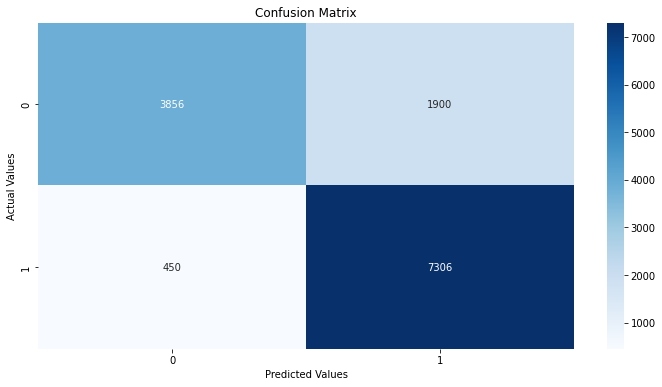

In [56]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [57]:
feature_imp = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

Faint             0.25
Dizziness         0.18
Consciousness     0.17
Paralysis         0.13
cv_cc             0.11
spo2_1            0.04
age               0.04
sbp2              0.01
spo2_2            0.01
sbp1              0.01
rr2               0.01
cv2_phx_yn        0.01
Spasm             0.01
medical_history   0.00
dbp2              0.00
pr2               0.00
dbp1              0.00
rr1               0.00
bt1               0.00
bt2               0.00
stroke            0.00
pr1               0.00
cv2_act           0.00
sex               0.00
Hour              0.00
Month             0.00
Weekday           0.00
obstacle2         0.00
dtype: float64

In [58]:
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_res, y_train_res)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train_res, y_train_res)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

NameError: ignored

In [ ]:
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_miss, y_train_miss)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train_miss, y_train_miss)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 82.65544647031324
The Accuracy for Test Set is 81.01361573373677
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       535
           1       0.81      0.89      0.85       787

    accuracy                           0.81      1322
   macro avg       0.81      0.79      0.80      1322
weighted avg       0.81      0.81      0.81      1322



# Adding More features and removing unneccessary features

Will add features realated with diseases history

In [62]:
data_ph2.columns

Index(['cv_cc', 'cv2_cc', 'cv2_phx_yn', 'cv2_act', 'sex', 'medical_history',
       'stroke', 'obstacle2', 'cv2_cphss', 'hypertension', 'diabetes',
       'chest_disease', 'heart_disease', 'tuberculosis', 'hepatitis', 'liver',
       'allergy', 'cancer', 'renal_failure', 'triage', 'onset', 'test1',
       'call_d', 'call_t', 'age', 'dbp1', 'sbp1', 'pr1', 'rr1', 'bt1',
       'spo2_1', 'dbp2', 'sbp2', 'pr2', 'rr2', 'bt2', 'spo2_2', 'Datetime',
       'Datetime_converted', 'Weekday', 'Month', 'Hour', 'Minute', 'Spasm',
       'Dizziness', 'Faint', 'Consciousness', 'Paralysis', 'Disease_History'],
      dtype='object')

In [63]:
def test(row):  
    if row['onset'] == 'N':
        return row['test1']
    return('presumed')

data_ph2['test'] = data_ph2.apply(lambda row: test(row), axis=1)

In [62]:
data_ph2.head()

,cv_cc,cv2_cc,cv2_phx_yn,cv2_act,sex,medical_history,stroke,obstacle2,cv2_cphss,hypertension,diabetes,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,triage,onset,test1,call_d,call_t,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Datetime,Datetime_converted,Weekday,Month,Hour,Minute,Spasm,Dizziness,Faint,Consciousness,Paralysis,Disease_History,test
0,Cerebralgia,Consciousness,N,Everyday life,female,no,no,no,1,no,yes,no,no,no,no,no,no,no,no,Emergency symptoms,N,Consciousness,20210123,1629,76,81.0,117.0,149.0,14.0,37.1,96.0,88.0,121.0,142.0,13.0,36.9,97.0,202101231629,2021-01-23 16:29:00,5.0,1.0,16.0,29.0,0,0,0,1,0,0,Consciousness
2,Cerebralgia,Consciousness,N,etc,male,Unknown,no,no,1,no,no,no,no,no,no,no,no,no,no,Emergency symptoms,Y,Consciousness,20210130,2153,70,70.0,105.0,75.0,18.0,34.0,98.0,60.0,102.0,75.0,18.0,34.0,98.0,202101302153,2021-01-30 21:53:00,5.0,1.0,21.0,53.0,0,0,0,1,0,0,presumed
4,Cerebralgia,headache,N,Everyday life,female,yes,no,no,1,no,no,no,no,no,no,no,no,no,no,Emergency symptoms,Y,"두통 , 어지러움",20210204,1352,52,108.0,207.0,60.0,18.0,35.0,99.0,80.0,190.0,62.0,18.0,35.0,99.0,202102041352,2021-02-04 13:52:00,3.0,2.0,13.0,52.0,0,1,0,0,0,0,presumed
5,Cerebralgia,Consciousness,N,Everyday life,female,no,no,no,1,yes,no,no,no,no,no,no,no,yes,no,Emergency symptoms,N,"고열, 호흡곤란",20210204,1451,78,70.0,120.0,144.0,28.0,40.0,92.0,65.0,99.0,135.0,24.0,39.5,96.0,202102041451,2021-02-04 14:51:00,3.0,2.0,14.0,51.0,0,0,0,1,0,0,"고열, 호흡곤란"
6,"Heart, cerebrovascular",faint,N,Everyday life,male,no,no,no,0,no,no,no,yes,no,no,no,no,no,no,Quasi -negative,N,I fell down,20210205,2032,47,80.0,126.0,79.0,13.0,36.5,98.0,82.0,128.0,80.0,13.0,36.6,98.0,202102052032,2021-02-05 20:32:00,4.0,2.0,20.0,32.0,0,0,1,0,0,0,I fell down


In [63]:
data_ph2.columns

Index(['cv_cc', 'cv2_cc', 'cv2_phx_yn', 'cv2_act', 'sex', 'medical_history',
       'stroke', 'obstacle2', 'cv2_cphss', 'hypertension', 'diabetes',
       'chest_disease', 'heart_disease', 'tuberculosis', 'hepatitis', 'liver',
       'allergy', 'cancer', 'renal_failure', 'triage', 'onset', 'test1',
       'call_d', 'call_t', 'age', 'dbp1', 'sbp1', 'pr1', 'rr1', 'bt1',
       'spo2_1', 'dbp2', 'sbp2', 'pr2', 'rr2', 'bt2', 'spo2_2', 'Datetime',
       'Datetime_converted', 'Weekday', 'Month', 'Hour', 'Minute', 'Spasm',
       'Dizziness', 'Faint', 'Consciousness', 'Paralysis', 'Disease_History',
       'test'],
      dtype='object')

In [64]:
model_data_2 = data_ph2[['cv_cc', #'cv_etc', #'cv2_cc', 
                         'cv2_phx_yn', 'cv2_act', 'sex',
       'medical_history', 'stroke', 'obstacle2', 'cv2_cphss', 'hypertension',
       'diabetes', 'chest_disease', 'heart_disease', 'tuberculosis',
       'hepatitis', 'liver', 'allergy', 'cancer', 'renal_failure', 'triage', 'onset', 'test1', 
       #'call_d', 'call_t', 
       'age', 'dbp1', 'sbp1', 'pr1',
       'rr1', 'bt1', 'spo2_1', 
       #'dbp2', 'sbp2', 'pr2', 'rr2', 'bt2', 'spo2_2', 'Date', 
       'Weekday', 'Month', 'Spasm', 'Dizziness', 'Faint',
       'Consciousness', 'Paralysis', 'Disease_History', 'Hour'
       #'test'
       ]]

model_data_2 = model_data_2.dropna()
model_data_2.shape

(91030, 37)

In [65]:
cat_columns = model_data_2.select_dtypes(['object']).columns
cat_columns

Index(['cv_cc', 'cv2_phx_yn', 'cv2_act', 'sex', 'medical_history', 'stroke',
       'obstacle2', 'hypertension', 'diabetes', 'chest_disease',
       'heart_disease', 'tuberculosis', 'hepatitis', 'liver', 'allergy',
       'cancer', 'renal_failure', 'triage', 'onset', 'test1', 'age'],
      dtype='object')

In [66]:
## Factorizing the categorical columns

model_data_2[cat_columns] = model_data_2[cat_columns].apply(lambda x: pd.factorize(x)[0])

model_data_2.head()

,cv_cc,cv2_phx_yn,cv2_act,sex,medical_history,stroke,obstacle2,cv2_cphss,hypertension,diabetes,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,triage,onset,test1,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,Weekday,Month,Spasm,Dizziness,Faint,Consciousness,Paralysis,Disease_History,Hour
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81.0,117.0,149.0,14.0,37.1,96.0,5.0,1.0,0,0,0,1,0,1,16.0
2,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,70.0,105.0,75.0,18.0,34.0,98.0,5.0,1.0,0,0,0,1,0,0,21.0
4,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,2,108.0,207.0,60.0,18.0,35.0,99.0,3.0,2.0,0,1,0,0,0,0,13.0
5,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,2,3,70.0,120.0,144.0,28.0,40.0,92.0,3.0,2.0,0,0,0,1,0,1,14.0
6,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,3,4,80.0,126.0,79.0,13.0,36.5,98.0,4.0,2.0,0,0,1,0,0,1,20.0


In [67]:
## Creating a past disease count variable
model_data_2['Disease_counts'] = model_data_2['hypertension'] + model_data_2['diabetes'] + model_data_2['chest_disease'] + model_data_2['heart_disease'] + model_data_2['tuberculosis'] + model_data_2['hepatitis'] + model_data_2['liver'] + model_data_2['allergy'] + model_data_2['cancer'] + model_data_2['renal_failure']

In [72]:
model_data_2.to_csv('model_data_2.csv')

In [4]:
model_data_2 = pd.read_csv('model_data_2 (1).csv')

In [5]:
model_data_2.columns

Index(['Unnamed: 0', 'cv_cc', 'cv2_phx_yn', 'cv2_act', 'sex',
       'medical_history', 'stroke', 'obstacle2', 'cv2_cphss', 'hypertension',
       'diabetes', 'chest_disease', 'heart_disease', 'tuberculosis',
       'hepatitis', 'liver', 'allergy', 'cancer', 'renal_failure', 'triage',
       'onset', 'test1', 'age', 'dbp1', 'sbp1', 'pr1', 'rr1', 'bt1', 'spo2_1',
       'Weekday', 'Month', 'Spasm', 'Dizziness', 'Faint', 'Consciousness',
       'Paralysis', 'Disease_History', 'Hour', 'Disease_counts'],
      dtype='object')

In [6]:
model_data_2.drop(['Unnamed: 0','hypertension','diabetes', 'chest_disease', 'heart_disease', 'tuberculosis',
       'hepatitis', 'liver', 'allergy', 'cancer', 'renal_failure'], axis = 1)

In [ ]:
X = model_data_2.iloc[:,model_data_2.columns != 'cv2_cphss']
y = model_data_2.cv2_cphss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', max_depth = 15, min_samples_leaf = 3, min_samples_split = 5) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

Faint              0.149854
Dizziness          0.124947
Paralysis          0.115919
Consciousness      0.109444
cv_cc              0.089280
triage             0.088926
test1              0.059152
spo2_1             0.035868
sbp1               0.025568
bt1                0.021405
pr1                0.020871
age                0.017715
dbp1               0.017678
Hour               0.015008
rr1                0.013048
Month              0.012115
Spasm              0.009634
diabetes           0.009555
Weekday            0.009509
cv2_phx_yn         0.007901
cv2_act            0.007691
medical_history    0.007498
Disease_counts     0.005854
Disease_History    0.004597
sex                0.004242
stroke             0.004221
onset              0.003627
hypertension       0.003467
heart_disease      0.001644
cancer             0.001342
renal_failure      0.000828
chest_disease      0.000642
liver              0.000491
obstacle2          0.000349
hepatitis          0.000053
tuberculosis       0

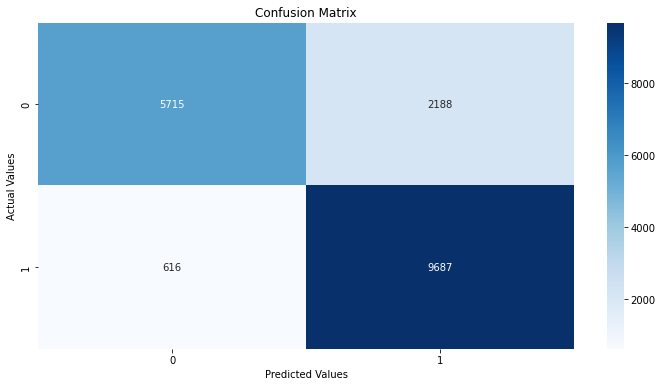

In [80]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

feature_imp = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 38%|███▊      | 11/29 [02:17<03:39, 12.19s/it]

In [ ]:
filtered_var = ['Faint',
'Consciousness',
'Dizziness',
'Paralysis',
'cv_cc',
'age',
'spo2_1',
'sbp1',
'rr1',
'dbp1',
'pr1',
'bt1',
'test1',
'cv_etc',
'cv2_phx_yn',
'medical_history',
'Spasm',
'cv2_act',
'stroke',
'Disease_History',
'diabetes',
'sex',
'hypertension',
'triage',
'Weekday',
'Month',
'Hour']

X_train_sub = X_train[filtered_var]
X_test_sub = X_test[filtered_var]

In [ ]:
filter2 = ['Faint','Consciousness','Dizziness','triage','Paralysis','cv_cc','test1','spo2_1','age','sbp1','bt1','dbp1','pr1','rr1','cv2_phx_yn','Spasm','cv_etc','medical_history','stroke','Hour']


X_train_sub = X_train[filter2]
X_test_sub = X_test[filter2]

In [ ]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 450, max_features = 'sqrt', max_depth = 6, min_samples_leaf = 6, min_samples_split = 10) 

clf.fit(X_train_sub, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test_sub)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train_sub, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 84.79304139172166
The Accuracy for Test Set is 85.30293941211757
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       688
           1       0.82      0.95      0.88       979

    accuracy                           0.85      1667
   macro avg       0.87      0.83      0.84      1667
weighted avg       0.86      0.85      0.85      1667





onset - maybe important when used with test1

1.   Triage - Is it related with final outcome directly ?
2.   Test1 - what is this variable?
3. onset - maybe important when used with test1



In [ ]:
model = LogisticRegression()
#class_weight="balanced"
clf.fit(X_train_sub, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test_sub)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train_sub, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 84.77804439112178
The Accuracy for Test Set is 85.30293941211757
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       688
           1       0.82      0.96      0.88       979

    accuracy                           0.85      1667
   macro avg       0.87      0.83      0.84      1667
weighted avg       0.86      0.85      0.85      1667



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

THRESHOLD = 0.3
preds = np.where(clf.predict_proba(X_test_sub)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.84
recall,0.97
precision,0.79
roc_auc_score,0.81
